khai báo thư viện

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error


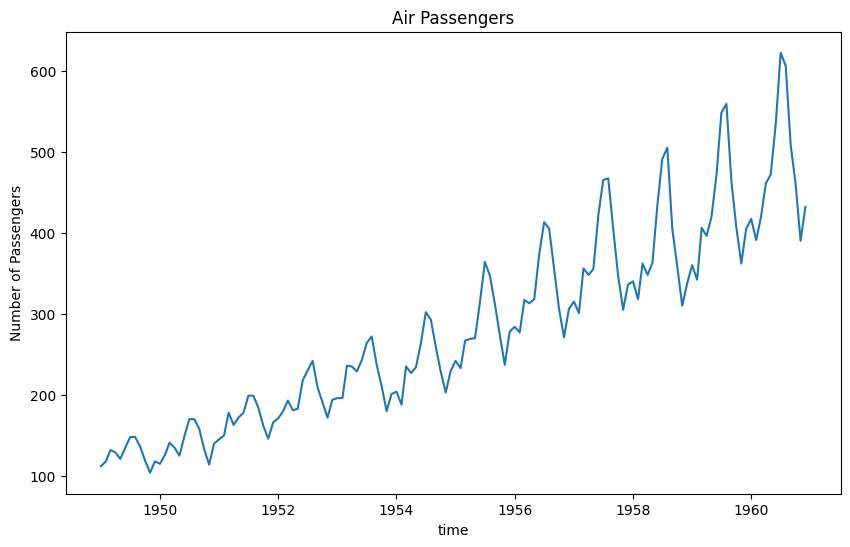

In [6]:

file_dulieu = 'https://raw.githubusercontent.com/thieu1995/csv-files/main/data/timeseries/univariate/AirPassengers.csv'
df = pd.read_csv(file_dulieu)


df['Month'] = pd.to_datetime(df['Month'])
df.set_index('Month', inplace=True)

plt.figure(figsize=(10, 6))
plt.plot(df)
plt.title('Air Passengers')
plt.xlabel('time')
plt.ylabel('Number of Passengers')
plt.show()

In [10]:
import numpy as np
from statsmodels.tsa.ar_model import AutoReg as ar_model
from statsmodels.tsa.arima_model import ARMA as arma_model
from statsmodels.tsa.arima_model import ARIMA as arima_model

# Data for models
time_series = df['#Passengers']
time_series.index.freq = 'MS'  # Set frequency to monthly

# Finding optimal lags for AR model
best_ar_aic = np.inf
best_ar_lag = None
for lag in range(1, 21):
    try:
        aic = ar_model(time_series, lag).fit().aic
        if aic < best_ar_aic:
            best_ar_aic = aic
            best_ar_lag = lag
    except:
        continue

print(f'Best AR model lag: {best_ar_lag} with AIC: {best_ar_aic}')

# Finding optimal lags for MA model
best_ma_aic = np.inf
best_ma_lag = None
for lag in range(1, 21):
    try:
        aic = arma_model(time_series, order=(0, lag)).fit().aic
        if aic < best_ma_aic:
            best_ma_aic = aic
            best_ma_lag = lag
    except:
        continue

print(f'Best MA model lag: {best_ma_lag} with AIC: {best_ma_aic}')

# Finding optimal (p, q) for ARMA model
best_arma_aic = np.inf
best_arma_p = None
best_arma_q = None
for p in range(1, 6):
    for q in range(1, 6):
        try:
            aic = arma_model(time_series, order=(p, q)).fit().aic
            if aic < best_arma_aic:
                best_arma_aic = aic
                best_arma_p = p
                best_arma_q = q
        except:
            continue

print(f'Best ARMA model (p, q): ({best_arma_p}, {best_arma_q}) with AIC: {best_arma_aic}')


Best AR model lag: 20 with AIC: 968.4988209741512
Best MA model lag: None with AIC: inf
Best ARMA model (p, q): (None, None) with AIC: inf


In [25]:
# Finding optimal (p, d, q) for ARIMA model
best_arima_aic = np.inf
best_arima_p = None
best_arima_d = None
best_arima_q = None
for p in range(1, 6):
    for d in range(0, 3):  # Usually, d is 0, 1, or 2
        for q in range(1, 6):
            try:
                aic = arima_model(time_series, p, d, q)
                if aic < best_arima_aic:
                    best_arima_aic = aic
                    best_arima_p = p
                    best_arima_d = d
                    best_arima_q = q
            except:
                continue

print(f'Best ARIMA model (p, d, q): ({best_arima_p}, {best_arima_d}, {best_arima_q}) with AIC: {best_arima_aic}')


Best ARIMA model (p, d, q): (None, None, None) with AIC: inf


In [14]:
# Final comparison of the models
results = {
    'AR': best_ar_aic,
    'MA': best_ma_aic,
    'ARMA': best_arma_aic,
    'ARIMA': best_arima_aic
}

best_model = min(results, key=results.get)
print(f'The best model is {best_model} with AIC: {results[best_model]}')


The best model is AR with AIC: 968.4988209741512


In [15]:
# Split the data into training and test sets
train_size = int(len(time_series) * 0.7)
train, test = time_series[:train_size], time_series[train_size:]

print(f'Training set have: {len(train)} sample')
print(f'Test have : {len(test)} sample')


Training set have: 100 sample
Test have : 44 sample


In [16]:
def rmse(actual, predicted):
    return np.sqrt(mean_squared_error(actual, predicted))


In [18]:
# Train the best AR model
best_ar_model = ar_model(train, lags=best_ar_lag).fit()
ar_pred = best_ar_model.predict(start=len(train), end=len(train)+len(test)-1, dynamic=False)

# Calculate RMSE for AR model
ar_rmse = rmse(test, ar_pred)
print(f'AR model RMSE: {ar_rmse}')


AR model RMSE: 34.9259886600068


In [24]:
# Train the best MA model

ma_rmse    = np.inf
try:
    best_ma_model = arima_model(train, order=(0, 0, best_ma_lag)).fit()
    ma_pred = best_ma_model.predict(start=len(train), end=len(train)+len(test)-1, dynamic=False)
    # Calculate RMSE for MA model
    ma_rmse = rmse(test, ma_pred)
except:
    pass


print(f'MA model RMSE: {ma_rmse}')


MA model RMSE: inf
